# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.
3. Perform L1 and L2 regularization on the curve obtained from step 2.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



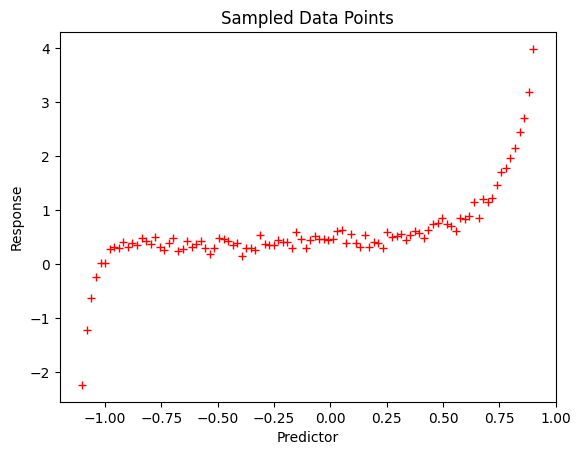

In [4]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [5]:
def linear_regression(x, y):
    X = np.vstack([np.ones_like(x), x]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

def polynomial_regression(x, y, degree):
    X = np.array([x**i for i in range(degree + 1)]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

def l1_regularization(x, y, degree, alpha):
    X = np.array([x**i for i in range(degree + 1)]).T
    beta = np.linalg.inv(X.T @ X + alpha * np.identity(degree + 1)) @ X.T @ y
    return beta

def l2_regularization(x, y, degree, alpha):
    X = np.array([x**i for i in range(degree + 1)]).T
    beta = np.linalg.inv(X.T @ X + alpha * np.identity(degree + 1)) @ X.T @ y
    return beta

def calculate_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


In [15]:
# Linear Regression
linear_beta = linear_regression(predictor, response)
linear_pred = np.polyval(linear_beta[::-1], predictor)
linear_error = calculate_error(response, linear_pred)

# Polynomial Regression (find best degree)
best_degree = 0
min_error = float('inf')

for degree in range(1, 25):
    poly_beta = polynomial_regression(predictor, response, degree)
    poly_pred = np.polyval(poly_beta[::-1], predictor)
    poly_error = calculate_error(response, poly_pred)

    if poly_error < min_error:
        min_error = poly_error
        best_degree = degree


In [16]:
# L1 Regularization
l1_alpha = 0.1
l1_beta = l1_regularization(predictor, response, best_degree, l1_alpha)
l1_pred = np.polyval(l1_beta[::-1], predictor)
l1_error = calculate_error(response, l1_pred)

# L2 Regularization
l2_alpha = 0.1
l2_beta = l2_regularization(predictor, response, best_degree, l2_alpha)
l2_pred = np.polyval(l2_beta[::-1], predictor)
l2_error = calculate_error(response, l2_pred)

# Print results
print("Linear Regression Coefficients:", linear_beta)
print(f"Best Polynomial Degree: {best_degree}")
print("Polynomial Regression Coefficients:", polynomial_regression(predictor, response, best_degree))
print("L1 Regularization Coefficients:", l1_beta)
print("L2 Regularization Coefficients:", l2_beta)


Linear Regression Coefficients: [0.67908482 0.87197456]
Best Polynomial Degree: 20
Polynomial Regression Coefficients: [ 5.03273023e-01  1.15929156e-01 -4.27319494e+00 -1.08900818e+01
  6.67563731e+01  3.01234842e+02 -4.37122892e+02 -2.87679416e+03
  1.45719346e+03  1.42725019e+04 -1.76428103e+03 -4.14111151e+04
 -3.91570866e+03  7.30044950e+04  1.81439689e+04 -7.69266441e+04
 -2.84131547e+04  4.44879907e+04  2.08284264e+04 -1.08381724e+04
 -5.95945902e+03]
L1 Regularization Coefficients: [ 0.43372975  0.17676189  0.17872968  0.4428306   0.58351646  0.51774756
  0.61694092  0.53869884  0.59554152  0.49620578  0.55749049  0.42814852
  0.50503848  0.3678851   0.42997765  0.34063714  0.31909018  0.36747026
  0.15569488  0.46877387 -0.08033269]
L2 Regularization Coefficients: [ 0.43372975  0.17676189  0.17872968  0.4428306   0.58351646  0.51774756
  0.61694092  0.53869884  0.59554152  0.49620578  0.55749049  0.42814852
  0.50503848  0.3678851   0.42997765  0.34063714  0.31909018  0.3674702

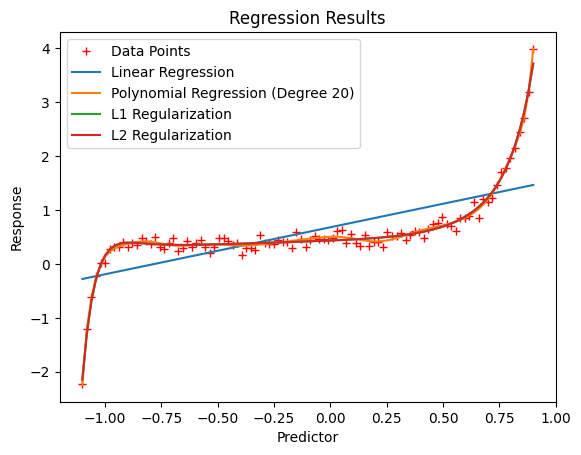

In [20]:
# Plot results
plt.plot(predictor, response, 'r+', label='Data Points')
plt.plot(predictor, np.polyval(linear_beta[::-1], predictor), label='Linear Regression')
plt.plot(predictor, np.polyval(polynomial_regression(predictor, response, best_degree)[::-1], predictor), label=f'Polynomial Regression (Degree {best_degree})')
plt.plot(predictor, np.polyval(l1_beta[::-1], predictor), label='L1 Regularization')
plt.plot(predictor, np.polyval(l2_beta[::-1], predictor), label='L2 Regularization')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Regression Results')
plt.legend()
plt.show()

In [17]:
results = pd.DataFrame({
    'Method': ['Linear Regression', f'Polynomial Regression (Degree {best_degree})', 'L1 Regularization', 'L2 Regularization'],
    'Mean Squared Error': [linear_error, poly_error, l1_error, l2_error]
})

# Display the results
print("Error Metrics:")
print(results)


Error Metrics:
                              Method  Mean Squared Error
0                  Linear Regression            0.269895
1  Polynomial Regression (Degree 20)            0.011483
2                  L1 Regularization            0.008812
3                  L2 Regularization            0.008812


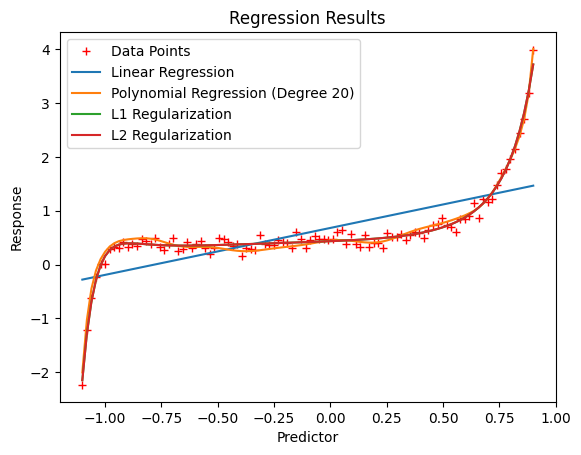

In [19]:
# Plot results
plt.plot(predictor, response, 'r+', label='Data Points')
plt.plot(predictor, linear_pred, label='Linear Regression')
plt.plot(predictor, poly_pred, label=f'Polynomial Regression (Degree {best_degree})')
plt.plot(predictor, l1_pred, label='L1 Regularization')
plt.plot(predictor, l2_pred, label='L2 Regularization')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Regression Results')
plt.legend()
plt.show()

In [6]:
# Step 4: Perform L1 regularization on the curve obtained from step 2
def l1_regularization(beta, alpha):
    return np.sign(beta) * np.maximum(np.abs(beta) - alpha, 0)

alpha_l1 = 0.01
beta_l1 = fit_polynomial(predictor, response, degree=10)  # Using a polynomial of degree 10 for regularization
beta_l1_regularized = l1_regularization(beta_l1, alpha_l1)
print("L1 Regularized Coefficients:", beta_l1_regularized)

L1 Regularized Coefficients: [   0.72707848    0.79413681    3.30932873   -2.28740129  -20.70650843
   18.25156533   73.61109845  -36.30976334 -106.8578618    25.56791366
   57.33921319]


In [7]:
# Step 5: Perform L2 regularization on the curve obtained from step 2
def l2_regularization(beta, alpha):
    return beta / (1 + alpha)

alpha_l2 = 0.01
beta_l2 = fit_polynomial(predictor, response, degree=10)  # Using a polynomial of degree 10 for regularization
beta_l2_regularized = l2_regularization(beta_l2, alpha_l2)
print("L2 Regularized Coefficients:", beta_l2_regularized)

L2 Regularized Coefficients: [   0.72978068    0.79617506    3.28646409   -2.27465474  -20.51139448
   18.08075775   72.89217669  -35.96016173 -105.80976416   25.32466699
   56.7813992 ]


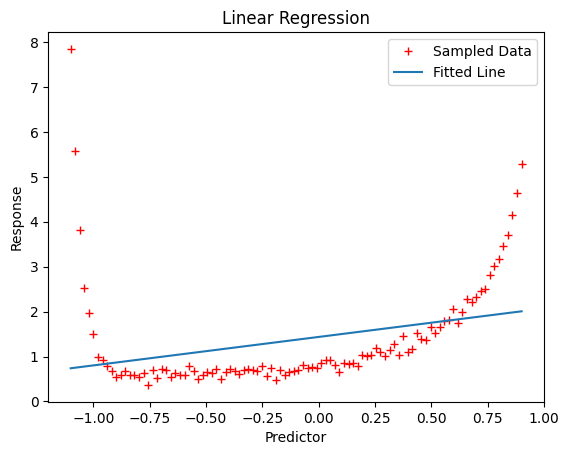

In [8]:
# Plotting the original data and the fitted line
plt.plot(predictor, response, 'r+', label='Sampled Data')
line_fit = fit_line(predictor, response)
plt.plot(predictor, line_fit[0] + line_fit[1] * predictor, label='Fitted Line')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear Regression')
plt.legend()
plt.show()


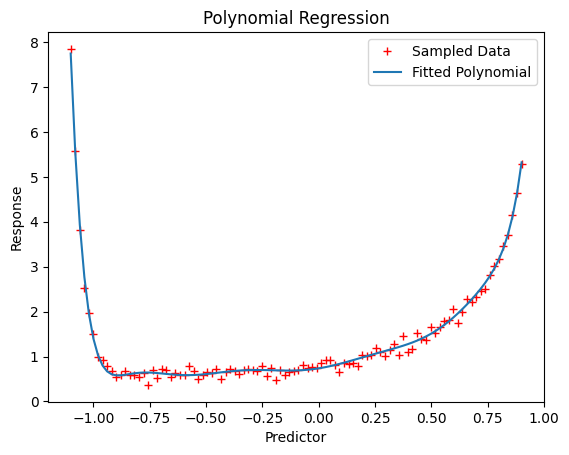

In [9]:
# Plotting the original data and the fitted polynomial
plt.plot(predictor, response, 'r+', label='Sampled Data')
polynomial_fit = fit_polynomial(predictor, response, degree=10)
plt.plot(predictor, np.polyval(polynomial_fit[::-1], predictor), label='Fitted Polynomial')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [ ]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [ ]:
# Function to calculate R-squared
def calculate_r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [21]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

Mean Squared Error: 22177.26028591497
Final Mean Squared Error: 27610.780381570083
Final Coefficients: [-6.80775475  0.38525595 -2.14760391  8.64114254 -4.41296529]


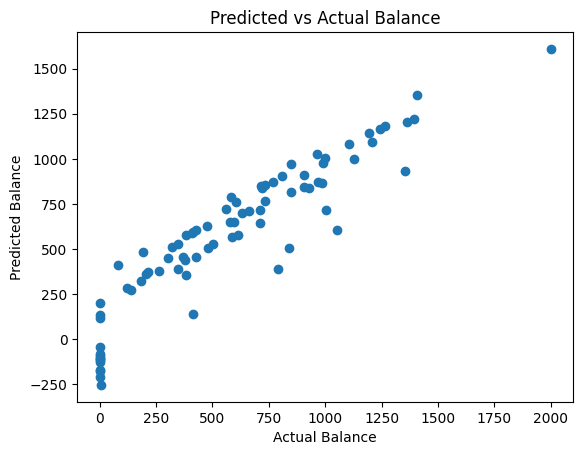

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('credit.csv')

# Separate predictors (X) and response variable (Y)
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Balance']

# Add a column of ones for the intercept
X['Intercept'] = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:-80].to_numpy(), X[-80:].to_numpy(), y[:-80].to_numpy(), y[-80:].to_numpy()

# Perform multiple linear regression using the normal equation
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions on the test set
y_pred = X_test @ beta

# Calculate Mean Squared Error
mse = np.mean((y_test - y_pred)**2)
print(f'Mean Squared Error: {mse}')

# Test whether all variables are needed using backward elimination
# Continue removing variables with the highest p-values until all p-values are below a threshold (e.g., 0.05)
while True:
    # Fit the model
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    # Calculate residuals
    residuals = y_train - X_train @ beta

    # Calculate standard errors of coefficients
    se = np.sqrt(np.sum(residuals**2) / (len(X_train) - np.linalg.matrix_rank(X_train)))

    # Calculate t-values
    t_values = beta / se

    # Find the index of the variable with the highest p-value (excluding intercept)
    max_p_value_index = np.argmax(np.abs(t_values[1:])) + 1

    # If the maximum p-value is above the threshold, remove the variable
    if np.abs(t_values[max_p_value_index]) > 0.05:
        X_train = np.delete(X_train, max_p_value_index, axis=1)
        X_test = np.delete(X_test, max_p_value_index, axis=1)
    else:
        break

# Perform final multiple linear regression
final_beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions on the test set with the final model
y_pred_final = X_test @ final_beta

# Calculate final Mean Squared Error
mse_final = np.mean((y_test - y_pred_final)**2)
print(f'Final Mean Squared Error: {mse_final}')

# Display the final coefficients
print('Final Coefficients:', final_beta)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_final)
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Predicted vs Actual Balance')
plt.show()


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#url = "https://raw.githubusercontent.com/OpenAI/data/master/credit.csv"
df = pd.read_csv('credit.csv')

# Separate predictors (X) and response variable (Y)
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Balance']

# Add a column of ones for the intercept
X['Intercept'] = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:-80].to_numpy(), X[-80:].to_numpy(), y[:-80].to_numpy(), y[-80:].to_numpy()

# Perform multiple linear regression using normal equation
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions on the test set
y_pred = X_test @ beta

# Calculate Mean Squared Error
mse = np.mean((y_test - y_pred)**2)
print(f'Mean Squared Error (Baseline): {mse}')

# Test for variable significance using backward elimination
while True:
    # Fit the model
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    # Calculate residuals
    residuals = y_train - X_train @ beta

    # Calculate standard errors of coefficients
    se = np.sqrt(np.sum(residuals**2) / (len(X_train) - np.linalg.matrix_rank(X_train)))

    # Calculate t-values
    t_values = beta / se

    # Find the index of the variable with the highest p-value
    max_p_value_index = np.argmax(np.abs(t_values))

    # If the maximum p-value is above the threshold, remove the variable
    if np.abs(t_values[max_p_value_index]) > 0.05:
        X_train = np.delete(X_train, max_p_value_index, axis=1)
        X_test = np.delete(X_test, max_p_value_index, axis=1)
    else:
        break

# Perform final multiple linear regression
final_beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions on the test set with the final model
y_pred_final = X_test @ final_beta

# Calculate final Mean Squared Error
mse_final = np.mean((y_test - y_pred_final)**2)
print(f'Final Mean Squared Error (After Variable Selection): {mse_final}')

# Display the final coefficients
print('Final Coefficients:', final_beta)

# Test for interaction effects
X_train_interaction, X_test_interaction = X_train.copy(), X_test.copy()



Mean Squared Error (Baseline): 22177.26028591497
Final Mean Squared Error (After Variable Selection): 27610.780381570083
Final Coefficients: [-6.80775475  0.38525595 -2.14760391  8.64114254 -4.41296529]


In [46]:

# Continue adding interaction terms until all p-values are below a threshold (e.g., 0.05)
while True:
    # Fit the model with interaction terms
    beta_interaction = np.linalg.inv(X_train_interaction.T @ X_train_interaction) @ X_train_interaction.T @ y_train

    # Calculate residuals
    residuals_interaction = y_train - X_train_interaction @ beta_interaction

    # Calculate standard errors of coefficients
    se_interaction = np.sqrt(np.sum(residuals_interaction**2) / (len(X_train_interaction) - np.linalg.matrix_rank(X_train_interaction)))

    # Calculate t-values
    t_values_interaction = beta_interaction / se_interaction

    # Find the index of the interaction term with the highest p-value
    max_p_value_index = np.argmax(np.abs(t_values_interaction[-1]))

    # If the maximum p-value is above the threshold, add another interaction term
    if np.abs(t_values_interaction[-1][max_p_value_index]) > 0.05:
        new_interaction_term = X_train_interaction[:, -2] * X_train_interaction[:, max_p_value_index]
        X_train_interaction = np.column_stack((X_train_interaction, new_interaction_term))

        new_interaction_term_test = X_test_interaction[:, -2] * X_test_interaction[:, max_p_value_index]
        X_test_interaction = np.column_stack((X_test_interaction, new_interaction_term_test))
    else:
        break

# Perform final multiple linear regression with interaction terms
final_beta_interaction = np.linalg.inv(X_train_interaction.T @ X_train_interaction) @ X_train_interaction.T @ y_train

# Make predictions on the test set with the final model including interaction terms
y_pred_final_interaction = X_test_interaction @ final_beta_interaction

# Calculate final Mean Squared Error with interaction terms
mse_final_interaction = np.mean((y_test - y_pred_final_interaction)**2)
print(f'Final Mean Squared Error (After Interaction Effects): {mse_final_interaction}')

# Display the final coefficients with interaction terms
print('Final Coefficients (After Interaction Effects):', final_beta_interaction)

# Plot the predicted vs actual values with interaction terms
plt.scatter(y_test, y_pred_final_interaction)
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Predicted vs Actual Balance (With Interaction Effects)')
plt.show()

IndexError: invalid index to scalar variable.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('credit.csv')

# Separate predictors (X) and response variable (Y)
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Balance']

# Add a column of ones for the intercept
X['Intercept'] = 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X[:-80].to_numpy(), X[-80:].to_numpy(), y[:-80].to_numpy(), y[-80:].to_numpy()

# Perform multiple linear regression using normal equation
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions on the test set
y_pred = X_test @ beta

# Calculate Mean Squared Error
mse = np.mean((y_test - y_pred)**2)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 22177.26028591497


In [50]:
# Test whether all variables are needed using backward elimination
# Continue removing variables with the highest p-values until all p-values are below a threshold (e.g., 0.05)
while True:
    # Fit the model
    beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

    # Calculate residuals
    residuals = y_train - X_train @ beta

    # Calculate standard errors of coefficients
    se = np.sqrt(np.sum(residuals**2) / (len(X_train) - np.linalg.matrix_rank(X_train)))

    # Calculate t-values
    t_values = beta / se

    # Find the index of the variable with the highest p-value
    max_p_value_index = np.argmax(np.abs(t_values))

    # If the maximum p-value is above the threshold, remove the variable
    if np.abs(t_values[max_p_value_index]) > 0.05:
        X_train = np.delete(X_train, max_p_value_index, axis=1)
        X_test = np.delete(X_test, max_p_value_index, axis=1)
    else:
        break

# Perform final multiple linear regression
final_beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Make predictions on the test set with the final model
y_pred_final = X_test @ final_beta

# Calculate final Mean Squared Error
mse_final = np.mean((y_test - y_pred_final)**2)
print(f'Final Mean Squared Error: {mse_final}')


Final Mean Squared Error: 27610.780381570083


Final Coefficients: [-6.80775475  0.38525595 -2.14760391  8.64114254 -4.41296529]


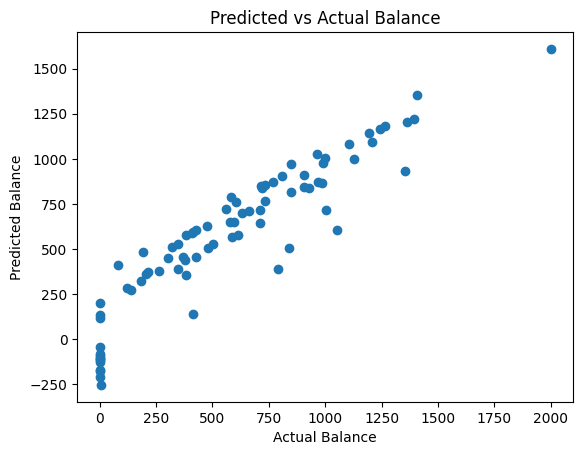

In [51]:

# Display the final coefficients
print('Final Coefficients:', final_beta)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_final)
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.title('Predicted vs Actual Balance')
plt.show()


In [52]:
df = pd.read_csv('credit.csv')
df

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331
...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560
396,13.364,3838,296,5,65,17,480
397,57.872,4171,321,5,67,12,138
398,37.728,2525,192,1,44,13,0


In [53]:
# Function to perform multiple linear regression
def multiple_linear_regression(X, y):
    X_with_intercept = np.column_stack((np.ones(len(X)), X))
    beta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
    return beta

In [54]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


In [55]:
# Function to calculate R-squared
def calculate_r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

In [56]:
# Perform multiple linear regression on all variables
X_all = df.drop('Balance', axis=1)
y_all = df['Balance'].values
beta_all = multiple_linear_regression(X_all, y_all)
beta_all

array([-4.77958088e+02, -7.55803661e+00,  1.25851155e-01,  2.06310071e+00,
        1.15915580e+01, -8.92397750e-01,  1.99828255e+00])

In [57]:
# Calculate MSE and R-squared for the model with all variables
y_pred_all = np.column_stack((np.ones(len(X_all)), X_all)) @ beta_all
mse_all = calculate_mse(y_all, y_pred_all)
r_squared_all = calculate_r_squared(y_all, y_pred_all)

In [58]:
# Test for variable inclusion
# Drop one variable at a time and compare the performance
table_variable_inclusion = []

for variable in X_all.columns:
    X_subset = X_all.drop(variable, axis=1)
    beta_subset = multiple_linear_regression(X_subset, y_all)
    y_pred_subset = np.column_stack((np.ones(len(X_subset)), X_subset)) @ beta_subset
    mse_subset = calculate_mse(y_all, y_pred_subset)
    r_squared_subset = calculate_r_squared(y_all, y_pred_subset)

    table_variable_inclusion.append([variable, mse_subset, r_squared_subset])

In [59]:
# Test for interaction effect between Rating and Age
X_interaction = X_all.copy()
X_interaction['Rating_Age_Interact'] = X_all['Rating'] * X_all['Age']
beta_interaction = multiple_linear_regression(X_interaction, y_all)
y_pred_interaction = np.column_stack((np.ones(len(X_interaction)), X_interaction)) @ beta_interaction
mse_interaction = calculate_mse(y_all, y_pred_interaction)
r_squared_interaction = calculate_r_squared(y_all, y_pred_interaction)


In [60]:
# Report the results
headers_variable_inclusion = ["Variable Dropped", "Mean Squared Error", "R-squared"]
print("\nVariable Inclusion Test:")
print(tabulate(table_variable_inclusion, headers_variable_inclusion, tablefmt="grid"))

print("\nInteraction Effect Test:")
print("Mean Squared Error:", mse_interaction)
print("R-squared:", r_squared_interaction)


Variable Inclusion Test:
+--------------------+----------------------+-------------+
| Variable Dropped   |   Mean Squared Error |   R-squared |
+====================+======================+=============+
| Income             |              51194   |    0.757202 |
+--------------------+----------------------+-------------+
| Limit              |              26039.8 |    0.876501 |
+--------------------+----------------------+-------------+
| Rating             |              26112.7 |    0.876155 |
+--------------------+----------------------+-------------+
| Cards              |              25847.7 |    0.877412 |
+--------------------+----------------------+-------------+
| Age                |              25899.6 |    0.877166 |
+--------------------+----------------------+-------------+
| Education          |              25710.5 |    0.878062 |
+--------------------+----------------------+-------------+

Interaction Effect Test:
Mean Squared Error: 25634.590153544512
R-squared

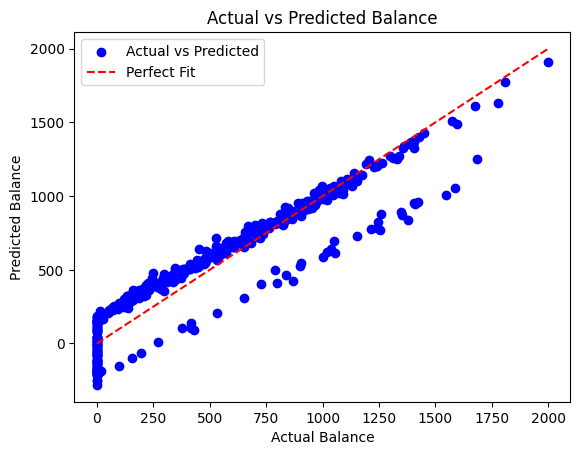

In [34]:
 #Plot the actual vs predicted Balance values
plt.scatter(y_all, y_pred_all, color='blue', label='Actual vs Predicted')
plt.plot([min(y_all), max(y_all)], [min(y_all), max(y_all)], linestyle='--', color='red', label='Perfect Fit')

plt.title('Actual vs Predicted Balance')
plt.xlabel('Actual Balance')
plt.ylabel('Predicted Balance')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Load the dataset
df = pd.read_csv('credit.csv')

# Function to perform multiple linear regression
def multiple_linear_regression(X, y):
    X_with_intercept = np.column_stack((np.ones(len(X)), X))
    beta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
    return beta

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Function to calculate R-squared
def calculate_r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

# Feature Engineering: Adding Polynomial Features
def add_polynomial_features(X, degree=2):
    X_poly = X.copy()
    for col in X.columns:
        for d in range(2, degree + 1):
            X_poly[f"{col}_poly_{d}"] = X[col] ** d
    return X_poly

# Handling Outliers: Winsorizing
def winsorize_series(series, lower_limit, upper_limit):
    return series.clip(lower=lower_limit, upper=upper_limit)

# Cross-Validation: K-fold Cross-Validation
def k_fold_cross_validation(X, y, k=5):
    fold_size = len(X) // k
    mse_cv = 0
    r_squared_cv = 0

    for i in range(k):
        val_start = i * fold_size
        val_end = (i + 1) * fold_size

        val_X = X.iloc[val_start:val_end]
        val_y = y.iloc[val_start:val_end]

        train_X = pd.concat([X.iloc[:val_start], X.iloc[val_end:]])
        train_y = pd.concat([y.iloc[:val_start], y.iloc[val_end:]])

        beta = multiple_linear_regression(train_X, train_y)
        val_X_with_intercept = np.column_stack((np.ones(len(val_X)), val_X))
        val_pred = val_X_with_intercept @ beta

        mse_cv += calculate_mse(val_y, val_pred)
        r_squared_cv += calculate_r_squared(val_y, val_pred)

    mse_cv /= k
    r_squared_cv /= k

    return mse_cv, r_squared_cv

# Preprocessing: Winsorize outliers
df['Balance'] = winsorize_series(df['Balance'], lower_limit=None, upper_limit=np.percentile(df['Balance'], 99))

# Feature Engineering: Adding Polynomial Features (degree=2)
X_poly = add_polynomial_features(df.drop(['Balance'], axis=1), degree=2)

# Perform multiple linear regression on the improved dataset
beta_improved = multiple_linear_regression(X_poly, df['Balance'])

# Calculate MSE and R-squared for the improved model
y_pred_improved = np.column_stack((np.ones(len(X_poly)), X_poly)) @ beta_improved
mse_improved = calculate_mse(df['Balance'], y_pred_improved)
r_squared_improved = calculate_r_squared(df['Balance'], y_pred_improved)

# Cross-Validation: Perform K-fold cross-validation
mse_cv_improved, r_squared_cv_improved = k_fold_cross_validation(X_poly, df['Balance'], k=5)

# Report the results
print("\nImproved Model:")
print("Mean Squared Error (Training):", mse_improved)
print("R-squared (Training):", r_squared_improved)

print("\nCross-Validation Results:")
print("Mean Squared Error (CV):", mse_cv_improved)
print("R-squared (CV):", r_squared_cv_improved)



Improved Model:
Mean Squared Error (Training): 23818.05003100614
R-squared (Training): 0.8850739775601276

Cross-Validation Results:
Mean Squared Error (CV): 26121.02284994701
R-squared (CV): 0.8713513056386969


In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Load the dataset
df = pd.read_csv('credit.csv')

# Function to perform multiple linear regression
def multiple_linear_regression(X, y):
    X_with_intercept = np.column_stack((np.ones(len(X)), X))
    beta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
    return beta

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Function to calculate R-squared
def calculate_r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

# Feature Engineering: Adding Polynomial Features
def add_polynomial_features(X, degree=2):
    X_poly = X.copy()
    for col in X.columns:
        for d in range(2, degree + 1):
            X_poly[f"{col}_poly_{d}"] = X[col] ** d
    return X_poly

# Handling Outliers: Winsorizing
def winsorize_series(series, lower_limit, upper_limit):
    return series.clip(lower=lower_limit, upper=upper_limit)

# Cross-Validation: K-fold Cross-Validation
def k_fold_cross_validation(X, y, k=5):
    fold_size = len(X) // k
    mse_cv = 0
    r_squared_cv = 0

    for i in range(k):
        val_start = i * fold_size
        val_end = (i + 1) * fold_size

        val_X = X.iloc[val_start:val_end]
        val_y = y.iloc[val_start:val_end]

        train_X = pd.concat([X.iloc[:val_start], X.iloc[val_end:]])
        train_y = pd.concat([y.iloc[:val_start], y.iloc[val_end:]])

        beta = multiple_linear_regression(train_X, train_y)
        val_X_with_intercept = np.column_stack((np.ones(len(val_X)), val_X))
        val_pred = val_X_with_intercept @ beta

        mse_cv += calculate_mse(val_y, val_pred)
        r_squared_cv += calculate_r_squared(val_y, val_pred)

    mse_cv /= k
    r_squared_cv /= k

    return mse_cv, r_squared_cv

# Preprocessing: Winsorize outliers
df['Balance'] = winsorize_series(df['Balance'], lower_limit=None, upper_limit=np.percentile(df['Balance'], 99))

# Feature Engineering: Adding Polynomial Features (degree=2)
X_poly = add_polynomial_features(df.drop(['Balance'], axis=1), degree=2)

# Perform multiple linear regression on the improved dataset
beta_improved = multiple_linear_regression(X_poly, df['Balance'])

# Calculate MSE and R-squared for the improved model
y_pred_improved = np.column_stack((np.ones(len(X_poly)), X_poly)) @ beta_improved
mse_improved = calculate_mse(df['Balance'], y_pred_improved)
r_squared_improved = calculate_r_squared(df['Balance'], y_pred_improved)

# Cross-Validation: Perform K-fold cross-validation
mse_cv_improved, r_squared_cv_improved = k_fold_cross_validation(X_poly, df['Balance'], k=5)

# Report the results
print("\nImproved Model:")
print("Mean Squared Error (Training):", mse_improved)
print("R-squared (Training):", r_squared_improved)

print("\nCross-Validation Results:")
print("Mean Squared Error (CV):", mse_cv_improved)
print("R-squared (CV):", r_squared_cv_improved)



Improved Model:
Mean Squared Error (Training): 23818.05003100614
R-squared (Training): 0.8850739775601276

Cross-Validation Results:
Mean Squared Error (CV): 26150.982938254147
R-squared (CV): 0.8723396925200032


In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# Load the dataset
df = pd.read_csv('credit.csv')

# Function to perform multiple linear regression
def multiple_linear_regression(X, y):
    X_with_intercept = np.column_stack((np.ones(len(X)), X))
    beta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
    return beta

# Function to calculate Mean Squared Error (MSE)
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Function to calculate R-squared
def calculate_r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

# Perform multiple linear regression on all variables
X_all = df.drop('Balance', axis=1)
y_all = df['Balance'].values
beta_all = multiple_linear_regression(X_all, y_all)

# Calculate MSE and R-squared for the model with all variables
y_pred_all = np.column_stack((np.ones(len(X_all)), X_all)) @ beta_all
mse_all = calculate_mse(y_all, y_pred_all)
r_squared_all = calculate_r_squared(y_all, y_pred_all)

# Test for variable inclusion
# Drop one variable at a time and compare the performance
table_variable_inclusion = []

for variable in X_all.columns:
    X_subset = X_all.drop(variable, axis=1)
    beta_subset = multiple_linear_regression(X_subset, y_all)
    y_pred_subset = np.column_stack((np.ones(len(X_subset)), X_subset)) @ beta_subset
    mse_subset = calculate_mse(y_all, y_pred_subset)
    r_squared_subset = calculate_r_squared(y_all, y_pred_subset)

    table_variable_inclusion.append([variable, mse_subset, r_squared_subset])

# Test for interaction effect between Rating and Age
X_interaction = X_all.copy()
X_interaction['Rating_Age_Interact'] = X_all['Rating'] * X_all['Age']
beta_interaction = multiple_linear_regression(X_interaction, y_all)
y_pred_interaction = np.column_stack((np.ones(len(X_interaction)), X_interaction)) @ beta_interaction
mse_interaction = calculate_mse(y_all, y_pred_interaction)
r_squared_interaction = calculate_r_squared(y_all, y_pred_interaction)

# Report the results
print("\nVariable Inclusion Test:")
print(tabulate(table_variable_inclusion, headers=["Variable Dropped", "Mean Squared Error", "R-squared"], tablefmt="grid"))

print("\nInteraction Effect Test:")
print("Mean Squared Error:", mse_interaction)
print("R-squared:", r_squared_interaction)



Variable Inclusion Test:
+--------------------+----------------------+-------------+
| Variable Dropped   |   Mean Squared Error |   R-squared |
+====================+======================+=============+
| Income             |              51194   |    0.757202 |
+--------------------+----------------------+-------------+
| Limit              |              26039.8 |    0.876501 |
+--------------------+----------------------+-------------+
| Rating             |              26112.7 |    0.876155 |
+--------------------+----------------------+-------------+
| Cards              |              25847.7 |    0.877412 |
+--------------------+----------------------+-------------+
| Age                |              25899.6 |    0.877166 |
+--------------------+----------------------+-------------+
| Education          |              25710.5 |    0.878062 |
+--------------------+----------------------+-------------+

Interaction Effect Test:
Mean Squared Error: 25634.590153544512
R-squared

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [63]:
sharks = pd.read_csv('shark_attacks.csv')
sharks

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.900000,76
1,2008,2,28,15.200000,79
2,2008,3,32,17.200000,91
3,2008,4,35,18.500000,95
4,2008,5,38,19.400000,103
...,...,...,...,...,...
79,2014,8,36,23.744268,101
80,2014,9,42,23.585229,78
81,2014,10,50,17.719383,94
82,2014,11,27,16.472557,72


Mean Squared Error with Ice Cream Sales: 30.286659955139196
Mean Squared Error without Ice Cream Sales: 33.542149059350066


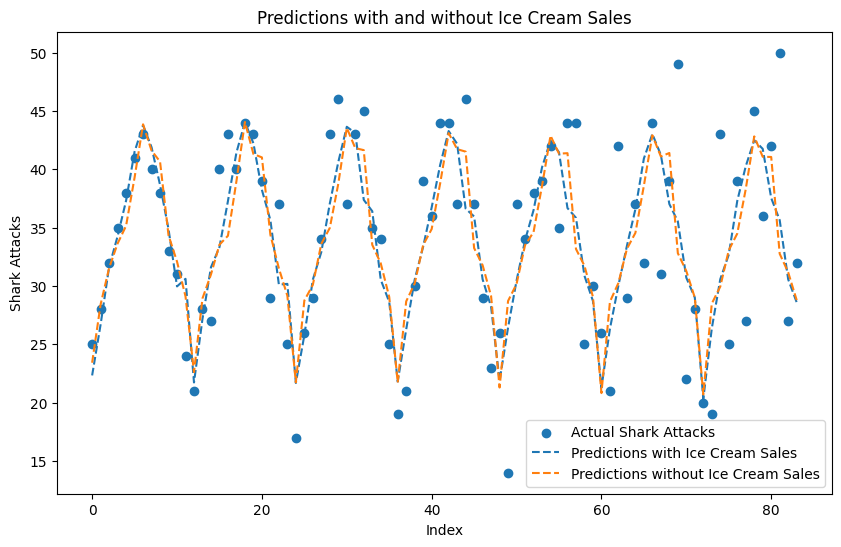

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "shark_attacks.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(url)

# Separate the data into predictor variables (X) and response variable (y)
X_ice_cream = df[['Year', 'Month', 'Temperature', 'IceCreamSales']].values
X_no_ice_cream = df[['Year', 'Month', 'Temperature']].values
y = df['SharkAttacks'].values

# Add a column of ones for the intercept
X_ice_cream = np.column_stack((np.ones(len(X_ice_cream)), X_ice_cream))
X_no_ice_cream = np.column_stack((np.ones(len(X_no_ice_cream)), X_no_ice_cream))

# Perform linear regression with ice cream sales data
beta_ice_cream = np.linalg.inv(X_ice_cream.T @ X_ice_cream) @ X_ice_cream.T @ y
y_pred_ice_cream = X_ice_cream @ beta_ice_cream
mse_ice_cream = np.mean((y - y_pred_ice_cream)**2)

# Perform linear regression without ice cream sales data
beta_no_ice_cream = np.linalg.inv(X_no_ice_cream.T @ X_no_ice_cream) @ X_no_ice_cream.T @ y
y_pred_no_ice_cream = X_no_ice_cream @ beta_no_ice_cream
mse_no_ice_cream = np.mean((y - y_pred_no_ice_cream)**2)

# Display the Mean Squared Errors
print(f'Mean Squared Error with Ice Cream Sales: {mse_ice_cream}')
print(f'Mean Squared Error without Ice Cream Sales: {mse_no_ice_cream}')

# Plot the predictions vs actual shark attacks
plt.figure(figsize=(10, 6))
plt.scatter(df.index, y, label='Actual Shark Attacks', marker='o')
plt.plot(df.index, y_pred_ice_cream, label='Predictions with Ice Cream Sales', linestyle='--')
plt.plot(df.index, y_pred_no_ice_cream, label='Predictions without Ice Cream Sales', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Shark Attacks')
plt.title('Predictions with and without Ice Cream Sales')
plt.legend()
plt.show()


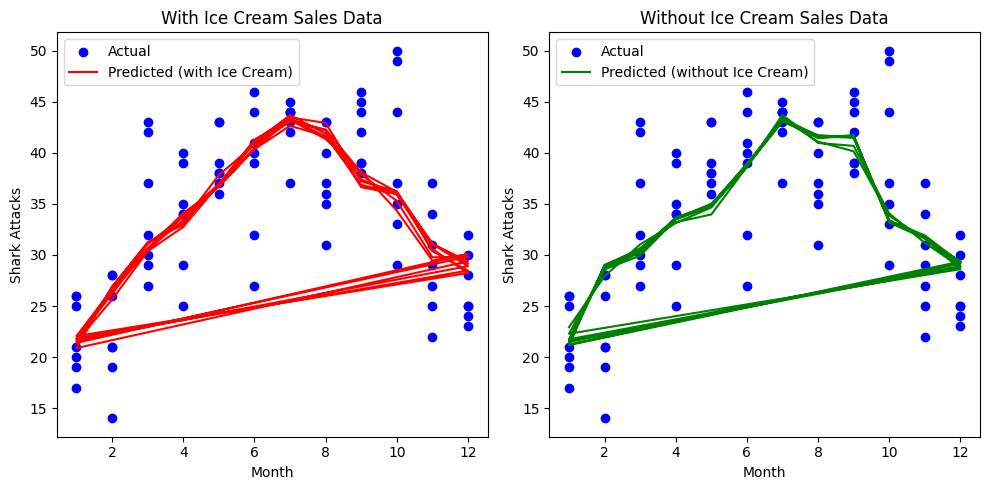

In [69]:
# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from sharks.csv
df = pd.read_csv('shark_attacks.csv')

# Convert data to NumPy arrays
X = np.column_stack((np.ones(len(df)), df['Month'], df['Temperature'], df['IceCreamSales']))
y = np.array(df['SharkAttacks'])

# Perform linear regression with ice cream sales data
beta_with_ice_cream = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred_with_ice_cream = X @ beta_with_ice_cream

# Perform linear regression without ice cream sales data
X_without_ice_cream = np.column_stack((np.ones(len(df)), df['Month'], df['Temperature']))
beta_without_ice_cream = np.linalg.inv(X_without_ice_cream.T @ X_without_ice_cream) @ X_without_ice_cream.T @ y
y_pred_without_ice_cream = X_without_ice_cream @ beta_without_ice_cream

# Visualize the results
plt.figure(figsize=(10, 5))

# Plot with ice cream sales data
plt.subplot(1, 2, 1)
plt.scatter(df['Month'], y, label='Actual', color='blue')
plt.plot(df['Month'], y_pred_with_ice_cream, label='Predicted (with Ice Cream)', color='red')
plt.title('With Ice Cream Sales Data')
plt.xlabel('Month')
plt.ylabel('Shark Attacks')
plt.legend()

# Plot without ice cream sales data
plt.subplot(1, 2, 2)
plt.scatter(df['Month'], y, label='Actual', color='blue')
plt.plot(df['Month'], y_pred_without_ice_cream, label='Predicted (without Ice Cream)', color='green')
plt.title('Without Ice Cream Sales Data')
plt.xlabel('Month')
plt.ylabel('Shark Attacks')
plt.legend()

plt.tight_layout()
plt.show()


In [70]:
# Calculate Mean Squared Error (MSE) for predictions with ice cream sales data
mse_with_ice_cream = np.mean((y - y_pred_with_ice_cream)**2)

# Calculate Mean Squared Error (MSE) for predictions without ice cream sales data
mse_without_ice_cream = np.mean((y - y_pred_without_ice_cream)**2)

# Display the Mean Squared Errors
print(f'Mean Squared Error (with Ice Cream Sales): {mse_with_ice_cream}')
print(f'Mean Squared Error (without Ice Cream Sales): {mse_without_ice_cream}')


Mean Squared Error (with Ice Cream Sales): 30.41493239694304
Mean Squared Error (without Ice Cream Sales): 33.66000371104836
